In [1]:
## Flight Fare Prediction | Machine Learning Project

#**Source:** [Kaggle Dataset - Flight Fare Prediction](https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh/code)  
#**Course:** Udemy - Machine Learning A-Z™

### 📌 Project Summary:
#- Built a predictive model to estimate flight prices using **scikit-learn**, leveraging features like departure time, duration, number of stops, airline, and route.
#- Engineered date/time-based features (e.g., **journey day, weekday, duration hours/minutes**) for better interpretability.
#- Performed **EDA** to identify pricing patterns, route frequency, and time-based trends.
#- Applied **one-hot encoding** and **target-guided encoding** for categorical variables to improve model performance.
#- Used **Mutual Information** and model-based feature selection techniques to identify important predictors.
#- Tuned hyperparameters using **RandomizedSearchCV** and automated the ML pipeline with `joblib` for future use.
#- Resulted in a robust, efficient, and interpretable model pipeline ready for real world deployment.



In [2]:
#Objective:
#To build a machine learning model that predicts flight prices based on various features like journey date, departure time, arrival time, duration, airline, stops, and route.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_excel("/Users/jessicameza/Downloads/Flight_Price_resources/Data_Train.xlsx")

In [5]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [6]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [10]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train_data.dropna(inplace= True)

In [12]:
train_data.isnull().sum() #missing values were cleaned out in this case it was 2 values.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.dtypes #object is similar to a string

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
data = train_data.copy()

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [17]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
def change_into_Datetime(col):
   data[col] = pd.to_datetime(data[col])

In [19]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [21]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey' ]:
    change_into_Datetime(feature)

In [22]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [23]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [24]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [25]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [26]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-24 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-24 05:50:00,2025-05-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-24 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [27]:
def extract_hour_min(df , col):
    df[col+"_hour"]= df[col].dt.hour
    df[col+ "_minute"]= df[col].dt.minute
    return df.head(3)

In [28]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [29]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-24 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-24 05:50:00,2025-05-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-24 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [30]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-24 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-24 05:50:00,2025-05-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-24 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [31]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis=1, inplace=True)

In [32]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [33]:
data.shape #number of total rows, columns cleaned out

(10682, 16)

In [34]:
#Analyze when will most of the flights take-off

In [35]:
#function will be designed.

In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [37]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return"Noon"
    elif(x>16) and (x<=20):
        return"Evening"
    elif (x>20) and (x<=24):
        return"Night"
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

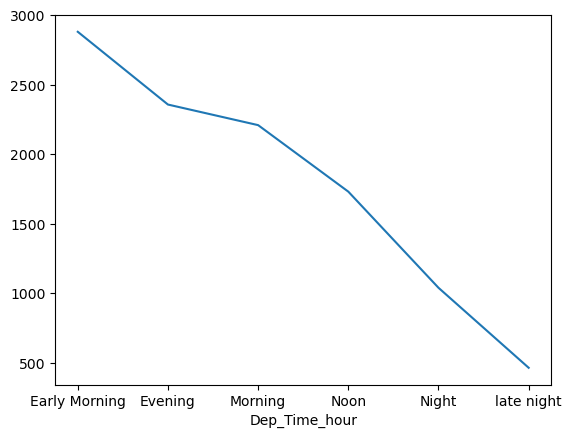

In [38]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot()

<Axes: xlabel='Dep_Time_hour'>

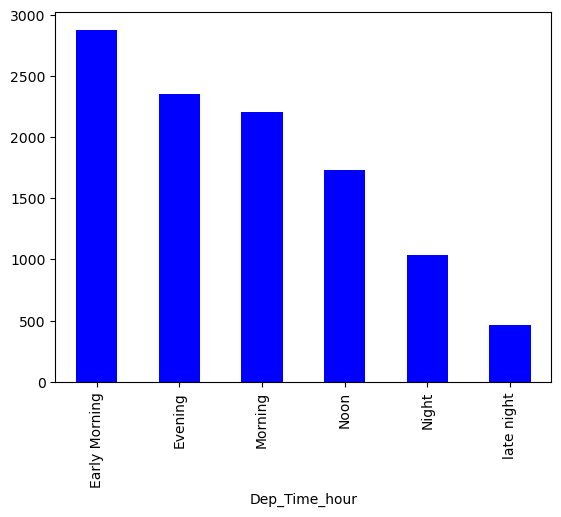

In [39]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind ="bar", color="b")

In [40]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [41]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected= True)
cf.go_offline()

In [42]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [43]:
#Found that early morning flights are more popular compared to the other 3 options.

In [44]:
#More data cleaning, changing the duration into a vector/number value

In [45]:
data.head(3) 

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [46]:
def preprocess_duration(x):
    if "h" not in x:
        x= "0h" + " "+ x
    elif "m" not in x:
        x= x+ " "+ "0m"

    return x

In [47]:
data["Duration"] = data["Duration"]. apply(preprocess_duration)

In [48]:
data["Duration_hours"]=data["Duration"].apply(lambda x :int(x.split (" ")[0][0:-1]))

In [49]:
data["Duration_mins"]=data["Duration"].apply(lambda x :int(x.split (" ")[1][0:-1]))

In [50]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [51]:
#Here we will analysis whether Duration of flight impacts the prices or not.

In [52]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [53]:
eval('2*60')

120

In [54]:
data['Duration_total_mins']=data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

In [55]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [56]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

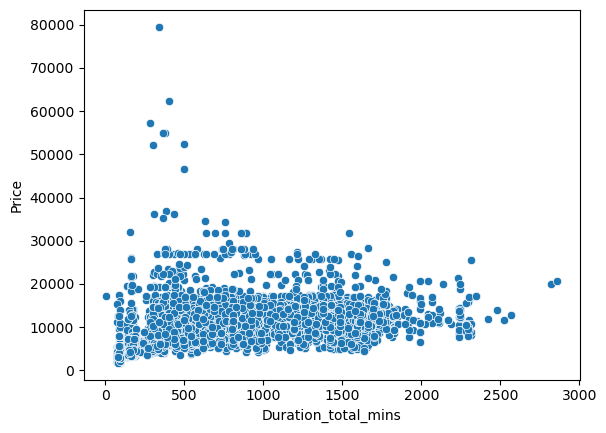

In [57]:
sns.scatterplot(x="Duration_total_mins", y="Price", data=data)

In [58]:
#The scatter plot above reveals a cluster that tells us that the majority of the duration minutes will not encounter higher prices. This is for all flights.

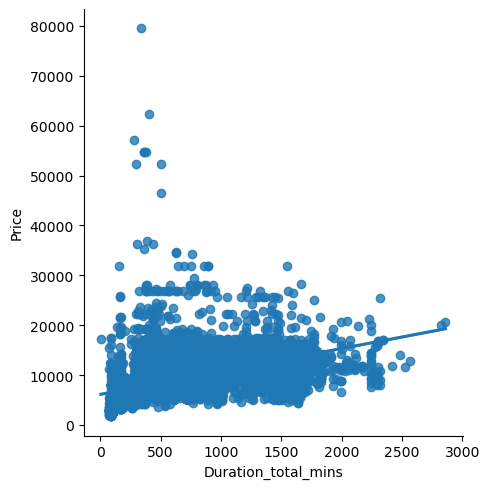

In [59]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data)

In [60]:
#The regression plot above shows that as the duration increases the prices also increase.

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

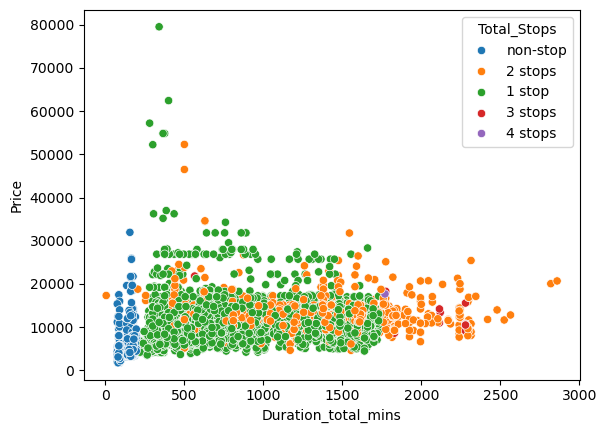

In [61]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops",data=data) #Hue parameter added for further clarification if the duration increases prices. 

In [62]:
#In the scatterplot above we are able to seperate by stops. As the stop increases so does the duration in total minutes. We also can see how the price increases in some cases.

In [63]:
#Time to deep dive in this section...

In [64]:
#Problems we are focusing on here are
#On which route are the Jet Airways extremely used?
#Exploring the Airline vs Price Analysis.

In [65]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [66]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending= False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [67]:
#This shows the top 10 routes in the ascending order from top 1 to the last one.

In [68]:
#A boxplot will be generated to see each airline minimum price at which ticket is booked and the percentile value.

In [69]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

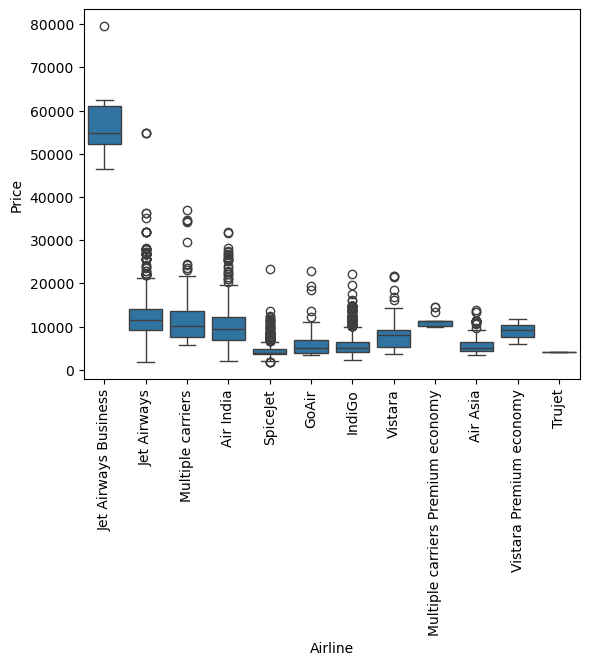

In [70]:
sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [71]:
#In the blot box above we have an order of ascending taking place that organizes the airlines by price of ticket.
#In this case, Jet Airways Business has the highest price value per ticket then the others. 

In [72]:
#Next section we are applying the one-hot on data

In [73]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [74]:
cat_col= [col for col in data.columns if data[col].dtype=="object"]

In [75]:
num_col= [col for col in data.columns if data[col].dtype!="object"]

In [76]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [77]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [78]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [79]:
#Applying one hot from scratch-feature encoding

In [80]:
data['Source'].apply(lambda x: 1 if x =='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [81]:
for sub_category in data['Source'].unique():
    data['Source_' +sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)
#Feature engineering

In [82]:
data.head(3) #Created new sub categories in this code line

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [83]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [84]:
#doing feature coding on airline

In [85]:
data['Airline'].nunique()

12

In [86]:
#Next up a targeted guided encoding will be performed on the data

In [87]:
#group data 
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [88]:
airlines= data.groupby(['Airline'])['Price'].mean().sort_values().index #These are the various airlines

In [89]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [90]:
#enumeration will help with indexing the list
dict_airlines={key: index for index, key in enumerate(airlines, 0)}

In [91]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [92]:
data['Airline']=data['Airline'].map(dict_airlines)

In [93]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [94]:
data.head(3) #airlines being displayed as int64

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [95]:
#next change destination by adding a feature

In [96]:
data['Destination'].replace ('New Delhi', 'Delhi', inplace= True)

In [97]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [98]:
dest= data.groupby(['Destination'])['Price'].mean().sort_values().index

In [99]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [100]:
dict_dest= {key:index for index, key in enumerate (dest, 0)}

In [101]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [102]:
data['Destination']=data['Destination'].map(dict_dest)

In [103]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [104]:
data.head(3) 

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [105]:
#up next a manual encoding will be performed on data

In [106]:
#Un-necessary features will be removed- especially if they make no sense to the machine learning

In [107]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [108]:
data['Total_Stops'] #we will be changing nonstop, 2 stops, etc.

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [109]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [110]:
#labling encoding will be done to convert categorical columns into numerical ones so that they can be fitted by machine learning

In [111]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [112]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [113]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [114]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [115]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [116]:
data['Additional_Info'].value_counts()/len(data)*100 #Shows percentage of data

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [117]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0


In [118]:
#dropping un-necessary features

In [119]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [120]:
data.drop(columns= ['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'],axis=1, inplace=True)

In [121]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [122]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [123]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [124]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [125]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [126]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [127]:
#Next there will be an outlier detection and dealing with an outlier

In [128]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.kdeplot(df[col] , ax=ax1) ## distribution-plot
    sns.boxplot(x = col , data = df ,  ax=ax2) ## box-plot
    sns.histplot(df[col] , ax=ax3 ) ## histogram

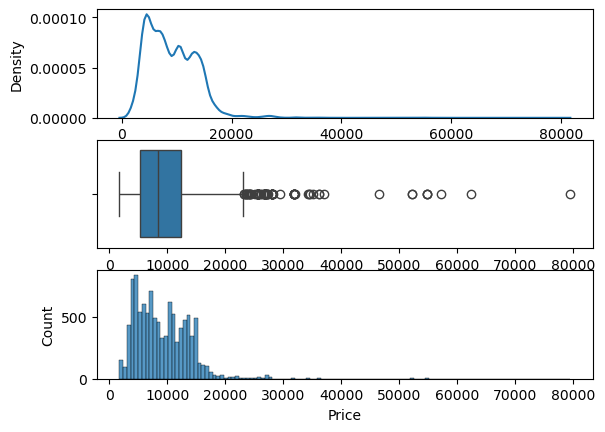

In [129]:
plot(data , 'Price')

In [130]:
q1= data['Price']. quantile(0.25)
q3= data['Price']. quantile(0.75)

iqr= q3-q1
maximum= q3+1.5*iqr
minimum=q1-1.5*iqr


In [131]:
print (maximum)

23017.0


In [132]:
print(minimum)

-5367.0


In [133]:
print([price for price in data['Price'] if price> maximum or price< minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [134]:
len([price for price in data['Price'] if price> maximum or price< minimum])

94

In [135]:
#shows we have 94 outliers, replace with median of price.

In [136]:
data['Price']=np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

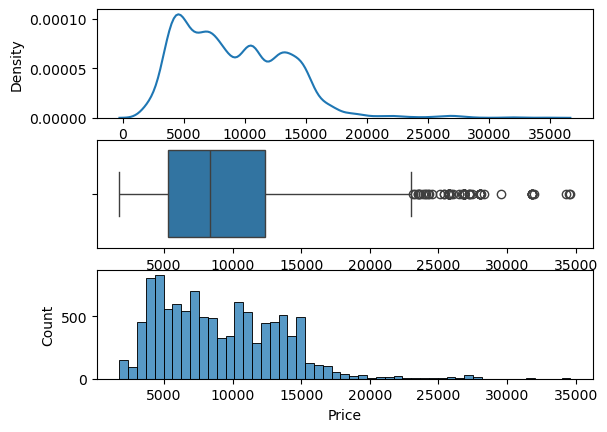

In [137]:
plot(data, 'Price') #here we have less skewness

In [138]:
#we will be looking at dependent features also known as target which is our price.

In [139]:
x= data.drop(['Price'], axis= 1)

In [140]:
x

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [141]:
y= data['Price']

In [142]:
from sklearn.feature_selection import mutual_info_regression #feature selection algorithm- identify the most relevant features from a dataset to improve model performance & enhance model accuracy

In [143]:
imp= mutual_info_regression(x,y)

In [144]:
imp

array([1.33487442, 1.06294048, 0.79463211, 0.37370894, 0.62721832,
       0.92507945, 0.76261706, 1.13940695, 0.89909243, 1.13070679,
       0.68543972, 0.39206002, 0.45927304, 0.52932391, 0.12554182,
       0.20787603])

In [145]:
imp_df=pd.DataFrame(imp, index= x.columns)

In [146]:
imp_df.columns= ['importance']

In [147]:
imp_df

,importance
Airline,1.334874
Destination,1.062940
Total_Stops,0.794632
Journey_day,0.373709
Journey_month,0.627218
Dep_Time_hour,0.925079
Dep_Time_minute,0.762617
Arrival_Time_hour,1.139407
Arrival_Time_minute,0.899092
Duration_hours,1.130707


In [148]:
imp_df.sort_values(by='importance', ascending= False)

,importance
Airline,1.334874
Arrival_Time_hour,1.139407
Duration_hours,1.130707
Destination,1.062940
Dep_Time_hour,0.925079
Arrival_Time_minute,0.899092
Total_Stops,0.794632
Dep_Time_minute,0.762617
Duration_mins,0.685440
Journey_month,0.627218


In [149]:
#Next we will build a ML model and save it

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test =train_test_split(
    x,y, test_size=0.25, random_state=42)

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
ml_model= RandomForestRegressor()

In [154]:
ml_model.fit(x_train, y_train)

RandomForestRegressor()

In [155]:
y_pred= ml_model.predict(x_test)

In [156]:
y_pred

array([16829.29,  5413.86,  8833.23, ...,  3478.78,  6175.7 ,  6869.62])

In [157]:
from sklearn import metrics

In [158]:
metrics.r2_score(y_test, y_pred) #percentage of accuracy close to 80%

0.8140247047032653

In [159]:
#model dumping

In [160]:
import pickle

In [161]:
with open('/users/jessicameza/Downloads/Flight_Price_resources/rf_random.pkl', 'wb') as file:
    pickle.dump(ml_model, file)

In [162]:
with open('/users/jessicameza/Downloads/Flight_Price_resources/rf_random.pkl', 'rb') as model:
    forest = pickle.load(model)

In [163]:
y_pred2= forest.predict(x_test)

In [164]:
metrics.r2_score(y_test, y_pred2)

0.8140247047032653

In [165]:
# evaluation metric and automating ml pipeline

In [166]:
def mape(y_true, y_pred):
    y_true, y_pred= np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100

In [167]:
mape(y_test, y_pred) #mean absolute percentage error

13.079912056937607

In [168]:
from sklearn import metrics

In [169]:
def predict(ml_model):
    model= ml_model.fit(x_train, y_train)
    print('Training score : {}'.format(model.score(x_train, y_train)))
    y_predection= model.predict(x_test)
    print('predection are :{}'. format(y_predection))
    print('\n')
    r2_score=metrics.r2_score(y_test, y_predection)
    print('r2 score :{}'.format(r2_score))
    print('MAE :{}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE :{}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE : score :{}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    print('MAPE :{}'.format(mape(y_test, y_predection)))
    sns.distplot(y_test- y_predection)
          


Training score : 0.9517198487516192
predection are :[16855.82  5354.4   8910.38 ...  3534.77  6206.3   6913.53]


r2 score :0.8088680940510937
MAE :1179.8490723878954
MSE :3720879.428303952
RMSE : score :1928.9581198937296
MAPE :13.200969706226843


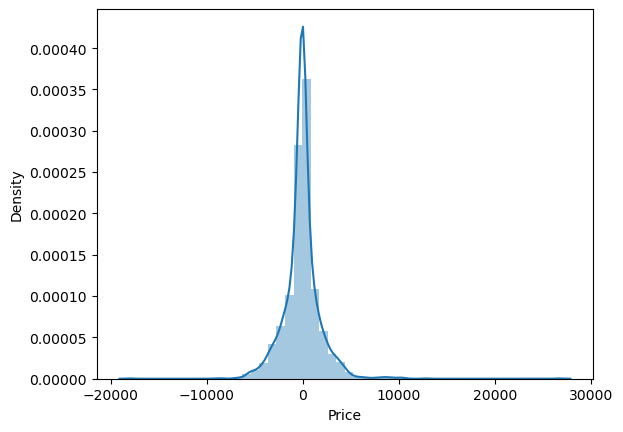

In [170]:
predict(RandomForestRegressor())

In [171]:
#ml model is working good as were close to zero meaning low error

In [172]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predection are :[16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score :0.6820105322833843
MAE :1398.0172844128292
MSE :6190491.655330297
RMSE : score :2488.0698654439543
MAPE :15.470630819152106


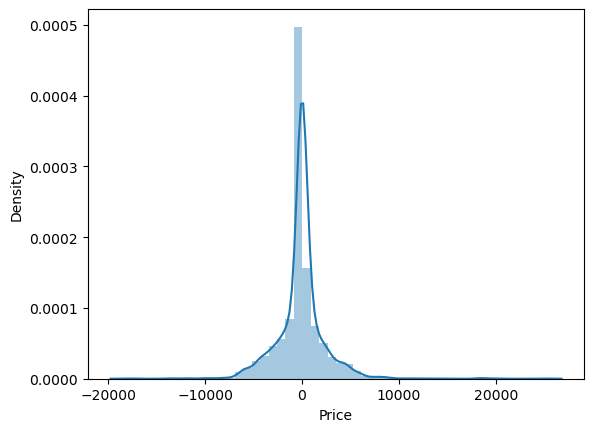

In [173]:
predict(DecisionTreeRegressor())

In [174]:
#hypertune ml model

In [175]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
reg_rf=RandomForestRegressor()

In [177]:
np.linspace(start=100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [178]:
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_features= ["auto", "sqrt"]
max_depth= [int(x) for x in np.linspace(start=5, stop=30, num=4)]
min_samples_split=[5,10,15,100]

In [179]:
random_grid= {
    'n_estimators' :n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' :min_samples_split
}

In [180]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [181]:
rf_random =RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [182]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [183]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 30}

In [184]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=15,
                      n_estimators=980)

In [185]:
rf_random.best_score_

0.7972389340045508

In [186]:
#using these paramters we reach a 80% accurate rate for r2